In [8]:
%matplotlib notebook
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
from cpaint import datasets
from cpaint.core import image_ops
import cv2
from cpaint.core.superpoint.util import nms_fast
from cpaint.core.detectors import DETECTORS

In [2]:
def disp(dataset, detector, output_dir, top_k):
    all_detections = []
    depth_paths, pose_paths = [], []
    det_res_dir = os.path.join(output_dir, "detector_out",
                               detector, dataset.name)
    num_taken = 0
    i = 0
    j = 2
    i = 4
    j = 8
    for it, (_, depth_path, pose_path, basename) in enumerate(dataset):
        if it > max(i, j):
            break
        # load result and convert back to matrix
        detections = np.zeros(image_ops.IMAGE_SIZE, dtype=np.int16)
        fname = os.path.join(det_res_dir, f"{basename}.csv")
        pts = np.genfromtxt(fname, delimiter=",").reshape(-1, 3)
        print(pts.shape)
        valid = np.where((pts[:, 0] < image_ops.IMAGE_SIZE[1]-1)*(pts[:, 1] < image_ops.IMAGE_SIZE[0]-1))
        out, out_inds = nms_fast(pts.T, image_ops.IMAGE_SIZE[1], image_ops.IMAGE_SIZE[0], 4)
        pts = out.T
        # Threshold detections
        pts = pts[(-pts[:, 2]).argsort(), :]
        num_take = min(pts.shape[0], top_k)
        num_take = (pts.shape[0])
        # round
        pts = (pts[:num_take] + 0.5)[:, :2].astype(np.int)
        detections[pts[:, 0], pts[:, 1]] = 1

        num_taken += num_take
        all_detections.append(torch.tensor(detections))
        pose_paths.append(pose_path)
        depth_paths.append(depth_path)
    print(f"Average taken {num_taken/len(dataset)} from total possible {top_k}")


    (rgb_path1, _, _, _) = dataset[i]
    (rgb_path2, _, _, _) = dataset[j]
    rgb1 = cv2.imread(rgb_path1)
    rgb1 = cv2.resize(rgb1, (image_ops.IMAGE_SIZE[1], image_ops.IMAGE_SIZE[0]))
    rgb2 = cv2.imread(rgb_path2)
    rgb2 = cv2.resize(rgb2, (image_ops.IMAGE_SIZE[1], image_ops.IMAGE_SIZE[0]))
    rgb1 = image_ops.draw_keypoints(all_detections[i].numpy(), rgb1)
    rgb2 = image_ops.draw_keypoints(all_detections[j].numpy(), rgb2)
    return rgb1, rgb2
#     fig = plt.figure(figsize=(4, 2), dpi=200)
#     fig.clf()
#     plt.cla()
#     plt.axis("off")
#     fig.add_subplot(1, 2, 1)
#     plt.imshow(rgb1)
#     plt.axis("off")
#     fig.add_subplot(1, 2, 2)
#     plt.imshow(rgb2)
#     plt.axis("off")
#     plt.show()



/data/output RealisticRendering test


<IPython.core.display.Javascript object>


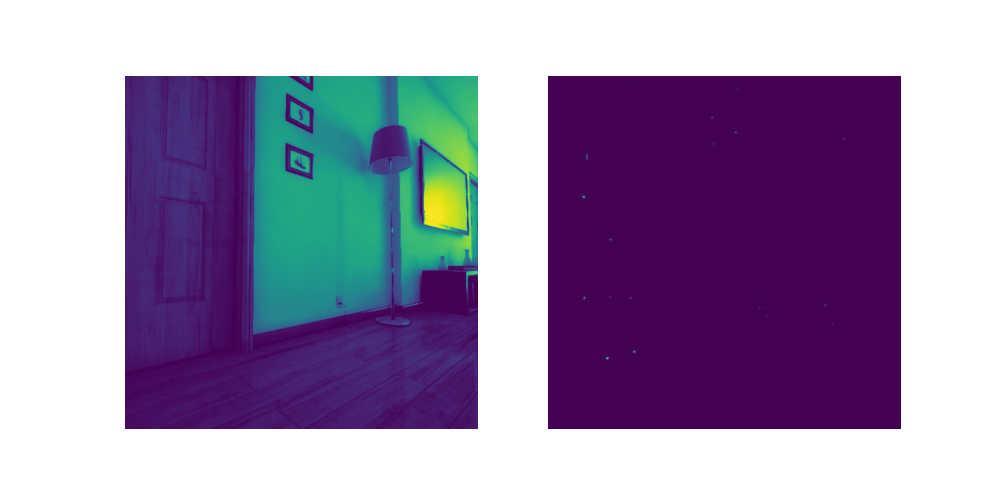

In [10]:
args = lambda x: x
# args.dataset_dir = "/externd/datasets"
args.dataset_dir = "/data/"
# args.detector = "magic_point"
# args.detector = "orb"
# args.detector = "fast"
#args.detector = "censure"
args.detector = "superpoint"
#args.detector = "superpoint2"
#args.detector = "sift"
# args.detector = "surf"
# args.detector = "magic_point3"
# args.detector = "magic_point4"
# args.detector = "lift"
# args.detector = "lfnet"
# args.output_dir = "/home/loopclosure/scannet_benchmark/output"
args.output_dir = "/data/output"
# args.output_dir = "/externd/datasets"

args.dataset = "RealisticRendering"
dataset = datasets.get_dataset_for_det_training(args.dataset_dir, args.dataset, args.output_dir, "test", True, 0.09)
det = DETECTORS["superpoint"]()

fig = plt.figure(figsize=(4, 2), dpi=200)
fig.clf()
plt.cla()


for (img, target, mask) in dataset:

    plt.axis("off")
    fig.add_subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    fig.add_subplot(1, 2, 2)
    plt.imshow(det.predict(target))
    plt.axis("off")
    plt.show()
    break

In [4]:
output_dir = "/home/loopclosure/scannet_benchmark/output"
name_map = {
    "sift": "SIFT",
    "lfnet": "LF-NET",
    "orb": "FAST",
    "surf": "SURF",
    "censure": "censure",
    "magic_point": "MagicPoint",
    "magic_point2": "SuperPoint - Gibson",
    "magic_point3": "SuperPoint - Gibson1",
    "magic_point4": "SuperPoint - Gibson2",
    "superpoint": "SuperPoint - COCO"
}
detectors = [
    "magic_point4",
    "magic_point",
#     "orb",
    "superpoint",
#     "sift",
#     "surf",
#     "lift",
#     "lfnet"
]

detectors1 = [
#     "magic_point",
#     "orb",
#     "superpoint",
    "sift",
    "surf",
#     "magic_point4",
#     "lift",
    "lfnet"
]

area = "scene0000_00"
fig = plt.figure(figsize=(3.5, 2*len(detectors)-1.3), dpi=200)
plt.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.0, top=0.99, bottom=0)
for i, detector in enumerate(detectors):
    dataset = datasets.DATASETS(args.dataset_dir, area)
    rgb1, rgb2 = disp(dataset, detector, output_dir, 200)
    
    plt.axis("off")
    sp = fig.add_subplot(len(detectors), 2, 2*i+1)
    sp.set_title(name_map[detector])
    plt.imshow(rgb1)
    plt.axis("off")
    fig.add_subplot(len(detectors), 2, 2*i+2)
    plt.imshow(rgb2)
    plt.axis("off")
plt.show()
fig.savefig(os.path.join(output_dir, "graphs", "all_examples.pdf"))

<IPython.core.display.Javascript object>

AttributeError: module 'cpaint.datasets' has no attribute 'DATASETS'